In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Énoncé
Vous êtes missionné sur le projet de nettoyage et exploration des données en interne, afin de déterminer la faisabilité de cette idée d’application de Santé publique France.

2- Exploration des données

In [2]:
prod = pd.read_csv('prod.csv', sep='\t', low_memory=False )
prod.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
prod_epur = pd.DataFrame(prod, columns=['code', 'creator','url','created_datetime', 'last_modified_datetime','product_name', 'brands',
 'brands_tags', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size', 'additives_n', 'additives',
 'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 'states','states_tags','states_fr','nutrition_grade_fr',
 'pnns_groups_1', 'pnns_groups_2','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g',
 'proteins_100g', 'salt_100g', 'sodium_100g','nutrition-score-fr_100g','nutrition-score-uk_100g'])


In [10]:
ep1=prod_epur.dropna(subset=['code'])
epp1=ep1.dropna(subset=['product_name'])


- Traitement des outliers pour certaines variables quantitatives (numeriques)

In [12]:
aa= list(epp1['proteins_100g'])
aa

[nan,
 3.57,
 17.86,
 17.86,
 8.57,
 13.46,
 8.89,
 14.06,
 5.0,
 nan,
 22.92,
 14.04,
 16.67,
 19.05,
 30.3,
 14.55,
 14.29,
 3.33,
 8.89,
 16.67,
 7.5,
 13.33,
 10.91,
 6.67,
 8.89,
 nan,
 12.96,
 16.67,
 16.67,
 20.0,
 6.67,
 13.33,
 5.0,
 14.29,
 11.76,
 10.91,
 nan,
 10.71,
 6.0,
 22.22,
 12.77,
 12.77,
 10.71,
 7.5,
 12.73,
 14.29,
 nan,
 nan,
 26.67,
 17.02,
 28.89,
 22.22,
 24.44,
 28.89,
 28.89,
 23.53,
 20.0,
 19.57,
 10.91,
 10.91,
 10.91,
 10.91,
 14.29,
 14.04,
 13.85,
 13.33,
 12.5,
 12.07,
 13.33,
 13.79,
 nan,
 nan,
 10.0,
 12.9,
 14.71,
 10.0,
 9.09,
 11.43,
 14.29,
 25.0,
 16.67,
 16.67,
 19.44,
 21.43,
 28.57,
 21.43,
 21.43,
 17.86,
 12.0,
 16.0,
 18.18,
 13.33,
 10.56,
 26.67,
 30.0,
 nan,
 11.6,
 nan,
 11.11,
 11.11,
 nan,
 25.0,
 22.86,
 10.0,
 10.0,
 2.5,
 7.5,
 26.47,
 5.0,
 10.0,
 15.38,
 15.38,
 12.5,
 12.2,
 10.71,
 13.16,
 12.5,
 12.73,
 13.04,
 12.5,
 12.0,
 14.89,
 10.0,
 13.33,
 13.33,
 20.69,
 15.38,
 15.38,
 16.0,
 17.5,
 15.22,
 17.5,
 6.67,
 13.33,
 

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


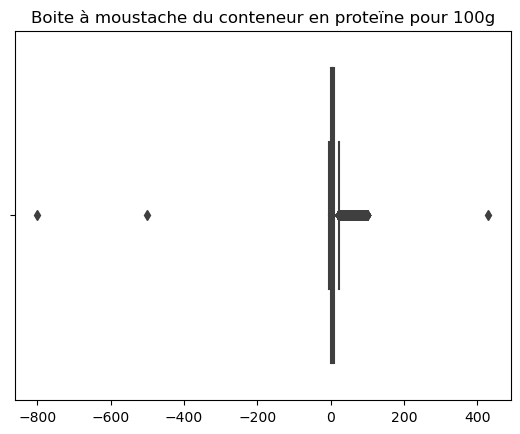

In [13]:
sns.boxplot(aa)
plt.title('Boite à moustache du conteneur en proteïne pour 100g')
plt.show()

In [14]:
bb= list(epp1['salt_100g'])
bb

[nan,
 0.0,
 0.635,
 1.22428,
 nan,
 nan,
 nan,
 0.1397,
 nan,
 nan,
 nan,
 nan,
 1.60782,
 0.09652,
 0.57658,
 0.02286,
 0.01016,
 nan,
 nan,
 0.0254,
 0.28448,
 0.46482,
 0.02286,
 1.27,
 0.19812,
 96.15678,
 0.28194,
 1.016,
 1.35382,
 2.032,
 nan,
 0.01016,
 0.127,
 nan,
 0.27432,
 0.04572,
 nan,
 nan,
 0.09398,
 nan,
 nan,
 nan,
 0.04572,
 1.651,
 nan,
 0.04572,
 nan,
 nan,
 0.08382,
 0.05334,
 0.05588,
 0.17526,
 0.04572,
 0.01778,
 0.05588,
 0.0508,
 0.02794,
 0.02794,
 0.254,
 0.254,
 0.254,
 0.18542,
 nan,
 0.11684,
 1.13284,
 0.02794,
 nan,
 nan,
 nan,
 2.75844,
 99.90582,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.254,
 nan,
 nan,
 0.54356,
 nan,
 nan,
 0.07112,
 1.54178,
 1.13284,
 1.08966,
 1.08966,
 0.58928,
 0.2032,
 nan,
 nan,
 0.127,
 nan,
 nan,
 0.04318,
 nan,
 11.176,
 nan,
 13.54582,
 13.26388,
 0.03302,
 2.29616,
 1.81356,
 0.71882,
 0.21082,
 0.09652,
 0.09652,
 0.97028,
 1.143,
 nan,
 nan,
 nan,
 0.03048,
 nan,
 nan,
 nan,
 nan,
 0.02286,
 0.02794,
 nan,
 nan,
 nan,
 0.020

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


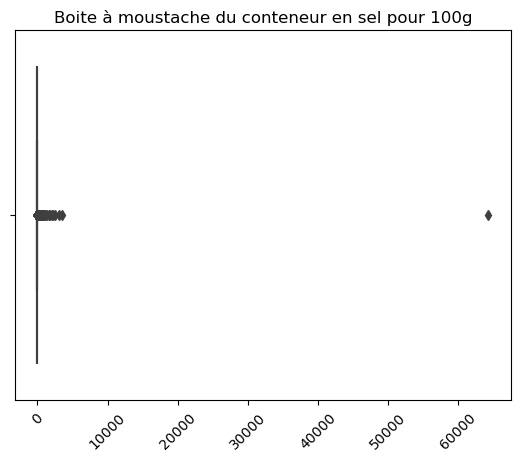

In [15]:
sns.boxplot(bb)
plt.title('Boite à moustache du conteneur en sel pour 100g')
plt.xticks(rotation= 45)
plt.show()

In [16]:
cc= list(epp1['fiber_100g'])
cc

[nan,
 3.6,
 7.1,
 7.1,
 5.7,
 7.7,
 nan,
 9.4,
 7.5,
 nan,
 12.5,
 1.8,
 6.7,
 38.1,
 15.2,
 9.1,
 10.7,
 3.3,
 2.2,
 9.5,
 5.0,
 6.7,
 9.1,
 10.0,
 4.4,
 nan,
 9.3,
 3.3,
 3.3,
 10.0,
 6.7,
 8.9,
 7.5,
 7.1,
 9.8,
 7.3,
 nan,
 7.1,
 16.0,
 24.4,
 10.6,
 12.8,
 7.1,
 7.5,
 9.1,
 39.3,
 nan,
 nan,
 15.6,
 14.9,
 28.9,
 44.4,
 26.7,
 33.3,
 28.9,
 15.7,
 26.7,
 13.0,
 7.3,
 7.3,
 9.1,
 9.1,
 10.7,
 1.8,
 3.1,
 4.4,
 3.6,
 1.7,
 3.3,
 6.9,
 nan,
 nan,
 3.3,
 6.4,
 5.9,
 13.3,
 5.5,
 11.4,
 10.7,
 7.1,
 23.3,
 11.1,
 13.9,
 7.1,
 7.1,
 7.1,
 17.9,
 7.1,
 8.0,
 8.0,
 9.1,
 6.7,
 7.0,
 13.3,
 10.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 28.8,
 22.9,
 10.0,
 6.7,
 2.5,
 2.5,
 8.8,
 nan,
 5.0,
 11.5,
 11.5,
 17.5,
 9.8,
 10.7,
 5.3,
 15.0,
 10.9,
 17.4,
 12.5,
 12.0,
 12.8,
 16.0,
 40.0,
 11.1,
 17.2,
 11.5,
 11.5,
 16.0,
 12.5,
 17.4,
 12.5,
 6.7,
 2.2,
 2.0,
 nan,
 10.0,
 6.2,
 5.9,
 3.9,
 2.2,
 13.3,
 8.0,
 nan,
 21.4,
 10.0,
 7.5,
 3.6,
 7.3,
 2.5,
 2.5,
 7.1,
 nan,
 nan,
 10.7,
 7.5,
 10.7

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


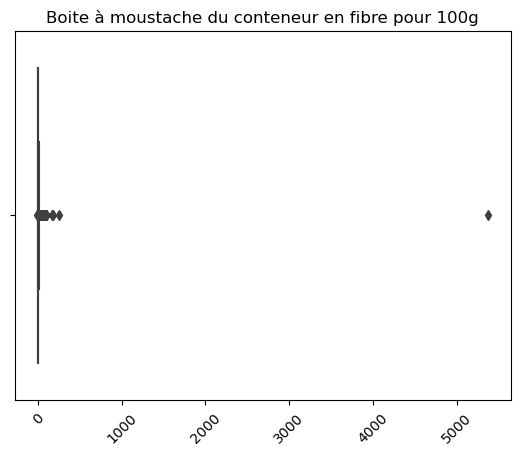

In [17]:
sns.boxplot(cc)
plt.title('Boite à moustache du conteneur en fibre pour 100g')
plt.xticks(rotation= 45)
plt.show()